In [1]:
from sklearn.datasets import fetch_mldata

### dataset containing 70000 handwritten digits by high school kids

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
mnist.data.shape

### Contains 70k handwritten digits, each digit is represented as 784 (28x28 matrix) columns. 

(70000, 784)

In [7]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
num = mnist.data[0].reshape((28,28))

In [9]:
mnist.target[0]

0.0

In [10]:
mnist.target[43295]  ## some random number for curiosity

7.0

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

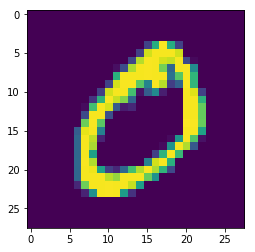

In [15]:
plt.imshow(num)

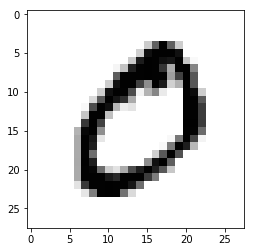

In [18]:
%matplotlib inline
plt.imshow(num, cmap = plt.matplotlib.cm.binary) ## for black and white appearance

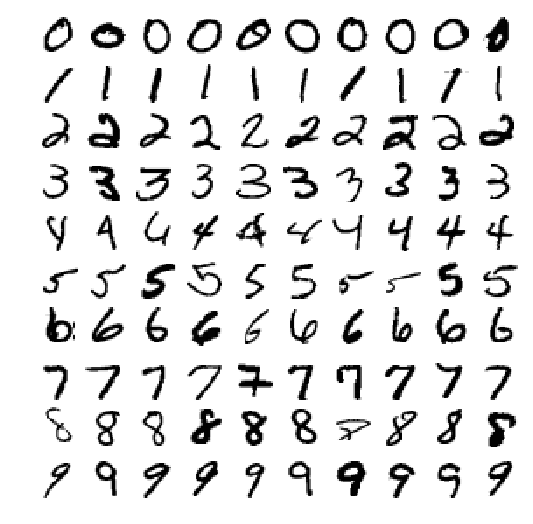

In [20]:
X, y = mnist["data"], mnist["target"]
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

plt.show()

# Splitting the data for training and testing

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)  ### Shuffling of the training data
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] 

In [22]:
X_train.shape

(60000, 784)

In [23]:
shuffle_index

array([54043, 59222, 15174, ..., 35955,  2622, 51993])

In [24]:
shuffle_index.shape

(60000,)

In [25]:
### Similar to : 


n = np.array([11,22,33])
idx = np.random.permutation(3) ## Just shuffles in any random way
n[idx]

array([11, 33, 22])

# Training the binary classifier

* Stochastic Gradient Descent (SGD) - handles large datasets efficiently

In [26]:
from sklearn.linear_model import SGDClassifier

In [27]:
### SGD Classifier to classift if its either 5 or not out of the entire 70k dataset

y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [28]:
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [29]:
y_test

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [30]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

## for values of X_train train the model to give out y_train_5 results
### Model preparation done, can be used for prediction

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.95695,  0.96235,  0.9346 ])

In [33]:
cross_val_score(sgd_clf, X_test, y_test_5, cv=3, scoring="accuracy")

array([ 0.89142172,  0.87248725,  0.93609361])

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [36]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

### Cross-validate and predict

In [37]:
confusion_matrix(y_train_5, y_train_pred)


#TP - data was 5, & predicted 5
#FP - data was not 5, but predicted as 5
#Precision Score = TP / ( TP + FP)

### TP - True Positive, FP - False Positive, TN = True Negative, FN = False Negative
## Here,  TP = 4647, FN = 52431, TN = 774, FP = 2148

array([[52431,  2148],
       [  774,  4647]])

In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
precision_score(y_train_5,y_train_pred)

0.68388520971302424

In [40]:
import seaborn as sns

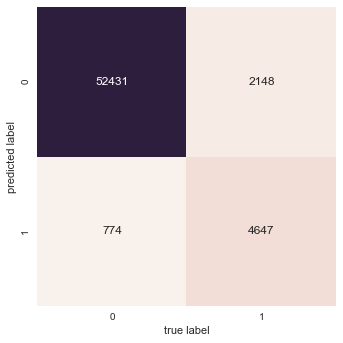

In [42]:
mat = confusion_matrix(y_train_5, y_train_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
recall_score(y_train_5, y_train_pred)

#recall score = TP/(TP + FN)

0.85722191477587162

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_train_5,y_train_pred)

0.76080550098231836

# The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:


* F1 = 2 * (precision * recall) / (precision + recall)